In [121]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [123]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [124]:
match1 = df2[(df2['team1'] == 'Rajasthan Royals') & (df2['team2'] == 'Kings XI Punjab')]
match2 = df2[(df2['team1'] == 'Kings XI Punjab') & (df2['team2'] == 'Rajasthan Royals')]

Match1 = Rajasthan Home Ground

Match2 = Punjab Home Ground

# Overall Punjab vs Rajasthan:

In [125]:
match = pd.concat((match1,match2))
match.head()

id  season        city        date             team1            team2  \
144  145    2009      Durban  2009-05-05  Rajasthan Royals  Kings XI Punjab   
192  193    2010  Chandigarh  2010-03-24  Rajasthan Royals  Kings XI Punjab   
310  311    2012      Jaipur  2012-04-06  Rajasthan Royals  Kings XI Punjab   
353  354    2012  Chandigarh  2012-05-05  Rajasthan Royals  Kings XI Punjab   
463  464    2014     Sharjah  2014-04-20  Rajasthan Royals  Kings XI Punjab   

          toss_winner toss_decision  result  dl_applied            winner  \
144   Kings XI Punjab         field  normal           0  Rajasthan Royals   
192   Kings XI Punjab         field  normal           0  Rajasthan Royals   
310   Kings XI Punjab         field  normal           0  Rajasthan Royals   
353  Rajasthan Royals           bat  normal           0  Rajasthan Royals   
463   Kings XI Punjab         field  normal           0   Kings XI Punjab   

     win_by_runs  win_by_wickets player_of_match  \
144           78               0        GC Smith   
192           31               0        AC Voges   
310           31               0       AM Rahane   
353           43               0       SR Watson   
463            0               7      GJ Maxwell   

                                          venue      umpire1      umpire2  \
144                                   Kingsmead    SS Hazare    IL Howell   
192  Punjab Cricket Association Stadium, Mohali  BR Doctrove  SK Tarapore   
310                      Sawai Mansingh Stadium    BF Bowden  SK Tarapore   
353  Punjab Cricket Association Stadium, Mohali    JD Cloete   SJA Taufel   
463                     Sharjah Cricket Stadium    BF Bowden    M Erasmus   

    umpire3  
144     NaN  
192     NaN  
310     NaN  
353     NaN  
463     NaN

Matches played between Punjab and Rajasthan.

In [126]:
match.shape

(19, 18)

In [127]:
match['winner'].value_counts()

Rajasthan Royals    10
Kings XI Punjab      9
Name: winner, dtype: int64

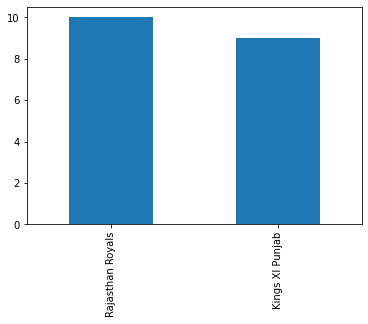

In [128]:
match['winner'].value_counts().plot.bar()
plt.show()

Punjab won 9 times and Rajasthan won 10 times against each other.

In [129]:
match['toss_winner'].value_counts()

Kings XI Punjab     10
Rajasthan Royals     9
Name: toss_winner, dtype: int64

In [130]:
match['toss_decision'].value_counts()

field    14
bat       5
Name: toss_decision, dtype: int64

In [131]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Rajasthan Royals    4
Kings XI Punjab     4
Name: winner, dtype: int64

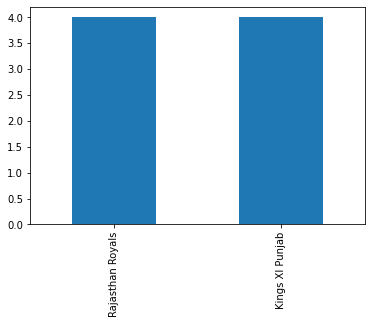

In [132]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Both won the toss and won the match 4 times. So winning toss doesn't have much affect to winning the match.

In [133]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning     batting_team      bowling_team  over  ball  \
15040        65       1  Kings XI Punjab  Rajasthan Royals     1     1   
15041        65       1  Kings XI Punjab  Rajasthan Royals     1     2   
15042        65       1  Kings XI Punjab  Rajasthan Royals     1     3   
15043        65       1  Kings XI Punjab  Rajasthan Royals     1     4   
15044        65       1  Kings XI Punjab  Rajasthan Royals     1     5   

      batsman non_striker    bowler  is_super_over  ...  bye_runs  \
15040  K Goel    JR Hopes  MM Patel              0  ...         0   
15041  K Goel    JR Hopes  MM Patel              0  ...         0   
15042  K Goel    JR Hopes  MM Patel              0  ...         0   
15043  K Goel    JR Hopes  MM Patel              0  ...         0   
15044  K Goel    JR Hopes  MM Patel              0  ...         0   

       legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
15040            0            0             0             0           0   
15041            0            0             0             0           0   
15042            0            0             0             0           0   
15043            0            0             0             0           0   
15044            0            0             0             1           0   

       total_runs  player_dismissed dismissal_kind fielder  
15040           0               NaN            NaN     NaN  
15041           0               NaN            NaN     NaN  
15042           0               NaN            NaN     NaN  
15043           0               NaN            NaN     NaN  
15044           1               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Punjab and Rajasthan.

In [134]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Which batsman has best (number of runs scored of boundaries: total runs scored) ratio:

In [135]:
ratio_dict = {}
batsman = ['R Parag', 'BA Stokes', 'SPD Smith', 'SV Samson', 'JC Buttler', 'M Lomror', 'J Archer', 'S Gopal', 'R Tewatia', 'Mandeep Singh', 'GJ Maxwell', 'KL Rahul', 'CH Gayle', 'N Pooran', 'DJ Hooda']
for j in batsman:
    ratio_list = []
    for k in ids:
        batsman_runs = list(delivery[(delivery['batsman'] == j) & (delivery['match_id'] == k)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        boundary_run = 0
        ratio = -999
        if len(batsman_runs) > 10:
            for i in batsman_runs:
                if i >= 4:
                    boundary_run += i
            if total_run > 0:
                ratio = (boundary_run/total_run)*100
            else:
                ratio = -999
        if ratio > 0:
            ratio_list.append(ratio)
    if len(ratio_list) != 0:
        ratio_dict[j] = ratio_list
for k,v in ratio_dict.items():
    ratio_dict[k] = np.mean(v)
ratio_dict

{'BA Stokes': 26.666666666666668,
 'SPD Smith': 58.78226711560046,
 'SV Samson': 44.49832259850123,
 'JC Buttler': 59.31937328735759,
 'S Gopal': 50.0,
 'R Tewatia': 37.5,
 'Mandeep Singh': 58.82352941176471,
 'GJ Maxwell': 76.40449438202246,
 'KL Rahul': 52.72577718500239,
 'CH Gayle': 84.72312001723766,
 'N Pooran': 28.57142857142857,
 'DJ Hooda': 73.33333333333333}

These are the ratios of current Punjab and Rajasthan batsmen in Punjab vs Rajasthan match till now.

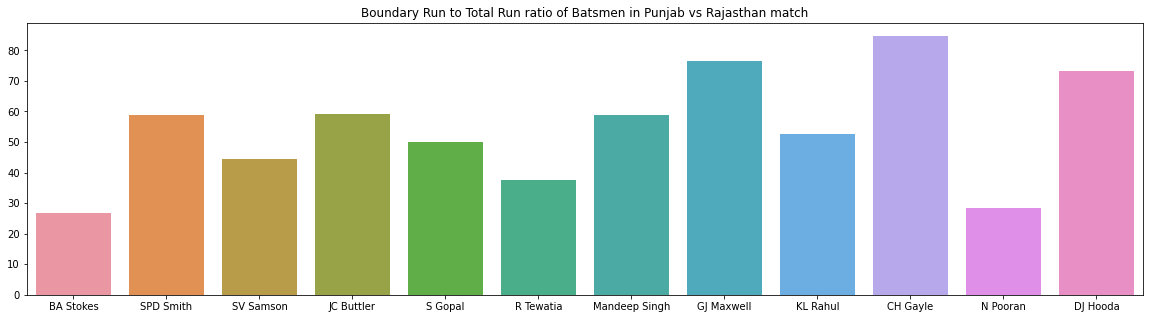

In [136]:
batsman_ratio = pd.Series(list(ratio_dict.values()),index = list(ratio_dict.keys()))
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x = batsman_ratio.index, y = batsman_ratio,ax=ax)
plt.title('Boundary Run to Total Run ratio of Batsmen in Punjab vs Rajasthan match')
plt.show()

**CH Gayle has the best ratio followed by GJ Maxwell, DJ Hooda and JC Buttler in Punjab vs Rajasthan match.**

In [137]:
ratio_dict_overall = {}
batsman_overall = ['M Vohra', 'R Parag', 'RV Uthappa', 'T Curran', 'BA Stokes', 'SPD Smith', 'SV Samson', 'JC Buttler', 'M Lomror', 'J Archer', 'S Gopal', 'R Tewatia', 'Mandeep Singh', 'GJ Maxwell', 'KL Rahul', 'CH Gayle', 'N Pooran', 'DJ Hooda', 'JDS Neesham', 'K Gowtham', 'CJ Jordan']
total_ids = list(df1[(df1['batting_team'].isin(['Rajasthan Royals','Kings XI Punjab']))]['match_id'].unique())
for j in batsman_overall:
    ratio_list = []
    for k in total_ids:
        batsman_runs = list(df1[(df1['batsman'] == j) & (df1['match_id'] == k)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        boundary_run = 0
        ratio = -999
        if len(batsman_runs) > 10:
            for i in batsman_runs:
                if i >= 4:
                    boundary_run += i
            if total_run > 0:
                ratio = (boundary_run/total_run)*100
            else:
                ratio = -999
        if ratio > 0:
            ratio_list.append(ratio)
    if len(ratio_list) != 0:
        ratio_dict_overall[j] = ratio_list
for k,v in ratio_dict_overall.items():
    ratio_dict_overall[k] = np.mean(v)
ratio_dict_overall

{'M Vohra': 63.50422430915852,
 'R Parag': 56.0,
 'RV Uthappa': 61.644272825770166,
 'BA Stokes': 41.6543181465667,
 'SPD Smith': 46.27001690992482,
 'SV Samson': 54.82800505574202,
 'JC Buttler': 64.0271847378571,
 'J Archer': 56.28815628815628,
 'S Gopal': 44.04761904761905,
 'R Tewatia': 36.60714285714286,
 'Mandeep Singh': 55.79679072230838,
 'GJ Maxwell': 69.49889221043503,
 'KL Rahul': 63.796411941643065,
 'CH Gayle': 76.11188443377344,
 'N Pooran': 64.72017226827104,
 'DJ Hooda': 54.90196078431372,
 'JDS Neesham': 33.33333333333333,
 'K Gowtham': 84.84848484848484}

These are the ratios of current Punjab and Rajasthan batsmen in overall IPL till now.

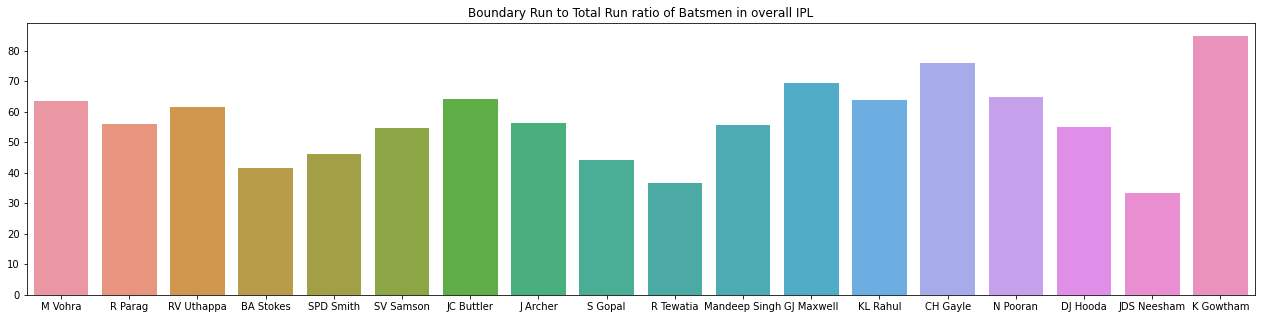

In [138]:
batsman_ratio_overall = pd.Series(list(ratio_dict_overall.values()),index = list(ratio_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(22,5))
sns.barplot(x = batsman_ratio_overall.index, y = batsman_ratio_overall,ax=ax)
plt.title('Boundary Run to Total Run ratio of Batsmen in overall IPL')
plt.show()

**K Gowtham has best ratio followed by CH Gayle, GJ Maxwell, N Pooran and JC Buttler in overall IPL.**

## Calculate OPP(Overall Player Performance) for batsmen and bowlers:

In [139]:
batsman = ['R Parag', 'BA Stokes', 'SPD Smith', 'SV Samson', 'JC Buttler', 'J Archer', 'S Gopal', 'R Tewatia', 'Mandeep Singh', 'GJ Maxwell', 'KL Rahul', 'CH Gayle', 'N Pooran', 'DJ Hooda']
opp_batsman_dict = {}
for j in batsman:
    opp_batsman_list = []
    for k in ids:
        batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['batsman'] == j)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        boundary_run = 0
        without_boundary_run = 0
        opp_batsman = -999
        for i in batsman_runs:
            if i >= 4:
                boundary_run += i
            elif i == 1 or i == 2 or i == 3:
                without_boundary_run += i
        total_ball = len(batsman_runs)
        if total_ball > 0:
            opp_batsman = ((total_run/total_ball)+boundary_run-without_boundary_run)/total_ball
        else:
            opp_batsman = -999
        if opp_batsman > 0:
            opp_batsman_list.append(opp_batsman)
    if len(opp_batsman_list) != 0:
        opp_batsman_dict[j] = opp_batsman_list
for k,v in opp_batsman_dict.items():
    opp_batsman_dict[k] = np.round(np.mean(v),2)
opp_batsman_dict

{'BA Stokes': 2.55,
 'SPD Smith': 0.96,
 'SV Samson': 0.9,
 'JC Buttler': 0.33,
 'S Gopal': 0.09,
 'Mandeep Singh': 0.66,
 'GJ Maxwell': 0.76,
 'KL Rahul': 0.56,
 'CH Gayle': 0.88,
 'DJ Hooda': 1.37}

In [140]:
max_opp_batsman_value = np.max(list(opp_batsman_dict.values()))
min_opp_batsman_value = np.min(list(opp_batsman_dict.values()))
normalised_opp_dict = {}
for i in opp_batsman_dict:
    normalised_opp_dict[i] = (opp_batsman_dict[i] - min_opp_batsman_value)/(max_opp_batsman_value - min_opp_batsman_value)
normalised_opp_dict

{'BA Stokes': 1.0,
 'SPD Smith': 0.35365853658536583,
 'SV Samson': 0.32926829268292684,
 'JC Buttler': 0.0975609756097561,
 'S Gopal': 0.0,
 'Mandeep Singh': 0.23170731707317077,
 'GJ Maxwell': 0.2723577235772358,
 'KL Rahul': 0.19105691056910573,
 'CH Gayle': 0.32113821138211385,
 'DJ Hooda': 0.5203252032520326}

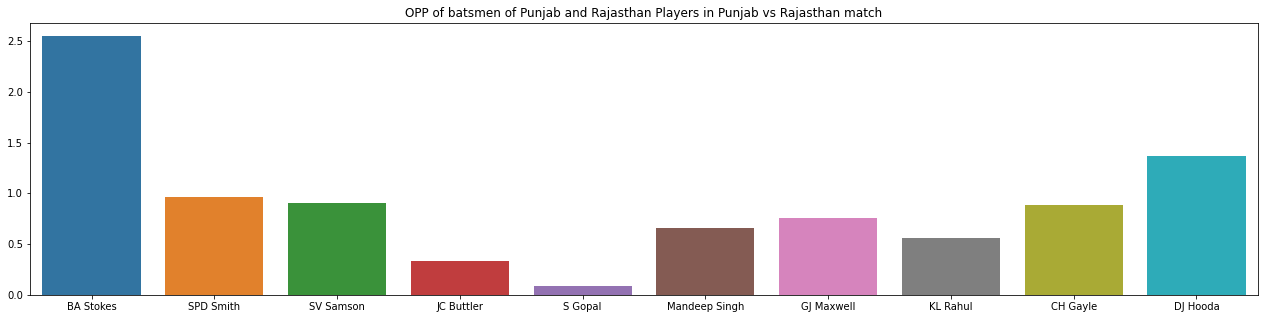

In [141]:
opp_batsman = pd.Series(list(opp_batsman_dict.values()),index = list(opp_batsman_dict.keys()))
fig, ax = plt.subplots(figsize=(22,5))
sns.barplot(x = opp_batsman.index, y = opp_batsman,ax=ax)
plt.title('OPP of batsmen of Punjab and Rajasthan Players in Punjab vs Rajasthan match')
plt.show()

**BA Stokes has the highest OPP among the batsmen of Punjab and Rajasthan in Punjab vs Rajasthan match.**

In [142]:
bowlers = ['S Gopal', 'JD Unadkat', 'DJ Hooda', 'K Gowtham', 'J Archer', 'BA Stokes', 'R Tewatia', 'Mohammed Shami', 'A Singh', 'M Ashwin', 'Mandeep Singh', 'GJ Maxwell']
opp_bowler_dict = {}
for j in bowlers:
    opp_bowler_list = []
    for k in ids:
        batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['batsman_runs'])
        wide_balls = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['wide_runs'])
        no_balls = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['noball_runs'])
        total_balls = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['ball'])
        legal_balls = len(total_balls)
        boundary_runs = 0
        boundary_count = 0
        opp = -999
        for i in range(len(batsman_runs)):
            if wide_balls[i] != 0:
                legal_balls -= 1
            elif no_balls[i] != 0:
                legal_balls -= 1
            if batsman_runs[i] >= 4:
                boundary_runs += batsman_runs[i]
                boundary_count += 1
        if legal_balls>0 and boundary_count>0:
            opp = (boundary_runs/boundary_count)/legal_balls
        else:
            opp = -999
        if opp > 0:
            opp_bowler_list.append(opp)
    if len(opp_bowler_list) != 0:
        opp_bowler_dict[j] = opp_bowler_list
for k,v in opp_bowler_dict.items():
    opp_bowler_dict[k] = np.mean(v)
opp_bowler_dict

{'S Gopal': 0.24537037037037035,
 'JD Unadkat': 0.21155753968253968,
 'DJ Hooda': 0.3055555555555556,
 'K Gowtham': 0.21369395711500974,
 'J Archer': 0.20240530303030305,
 'BA Stokes': 0.2476851851851852,
 'R Tewatia': 0.24305555555555558,
 'Mohammed Shami': 0.1830357142857143,
 'A Singh': 0.20833333333333334,
 'M Ashwin': 0.16666666666666666,
 'GJ Maxwell': 1.0}

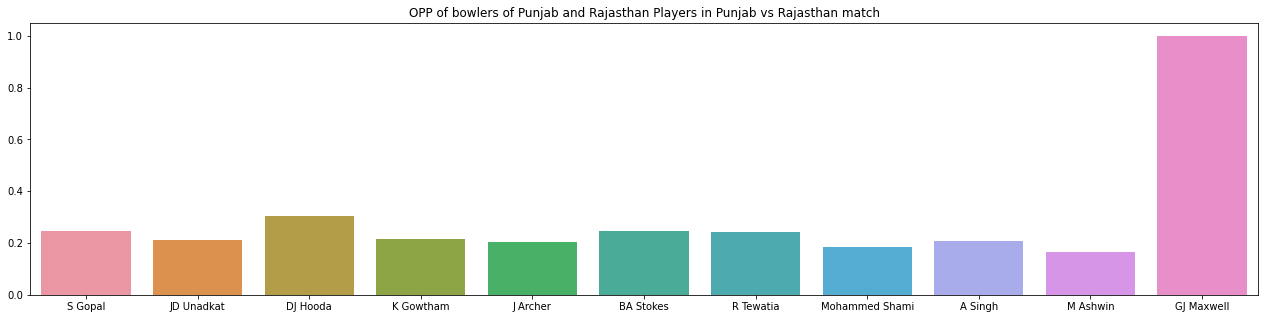

In [143]:
opp_bowler = pd.Series(list(opp_bowler_dict.values()),index = list(opp_bowler_dict.keys()))
fig, ax = plt.subplots(figsize=(22,5))
sns.barplot(x = opp_bowler.index, y = opp_bowler,ax=ax)
plt.title('OPP of bowlers of Punjab and Rajasthan Players in Punjab vs Rajasthan match')
plt.show()

**GJ Maxwell has the highest OPP among the bowlers of Punjab and Rajasthan in Punjab vs Rajasthan match.**

In [144]:
max_opp_bowler_value = np.max(list(opp_bowler_dict.values()))
min_opp_bowler_value = np.min(list(opp_bowler_dict.values()))
for i in opp_bowler_dict:
    if i not in normalised_opp_dict:
        normalised_opp_dict[i] = (opp_bowler_dict[i] - min_opp_bowler_value)/(max_opp_bowler_value - min_opp_bowler_value)
    else:
        normalised_opp_dict[i] += (opp_bowler_dict[i] - min_opp_bowler_value)/(max_opp_bowler_value - min_opp_bowler_value)
normalised_opp_dict

{'BA Stokes': 1.0972222222222223,
 'SPD Smith': 0.35365853658536583,
 'SV Samson': 0.32926829268292684,
 'JC Buttler': 0.0975609756097561,
 'S Gopal': 0.09444444444444443,
 'Mandeep Singh': 0.23170731707317077,
 'GJ Maxwell': 1.2723577235772359,
 'KL Rahul': 0.19105691056910573,
 'CH Gayle': 0.32113821138211385,
 'DJ Hooda': 0.6869918699186993,
 'JD Unadkat': 0.05386904761904762,
 'K Gowtham': 0.056432748538011696,
 'J Archer': 0.04288636363636367,
 'R Tewatia': 0.0916666666666667,
 'Mohammed Shami': 0.019642857142857174,
 'A Singh': 0.05000000000000002,
 'M Ashwin': 0.0}

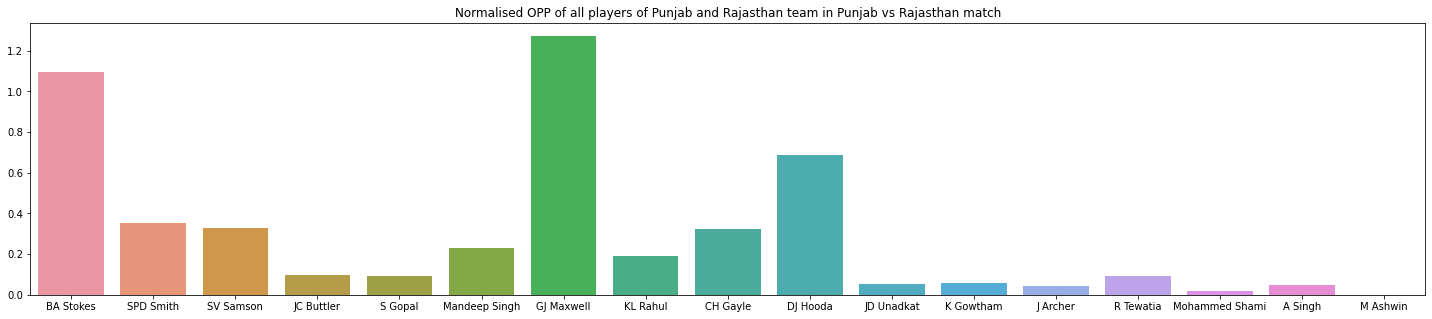

In [145]:
normalised_opp = pd.Series(list(normalised_opp_dict.values()),index = list(normalised_opp_dict.keys()))
fig, ax = plt.subplots(figsize=(25,5))
sns.barplot(x = normalised_opp.index, y = normalised_opp,ax=ax)
plt.title('Normalised OPP of all players of Punjab and Rajasthan team in Punjab vs Rajasthan match')
plt.show()

**So GJ Maxwell has the highest opp followed by BA Stokes in Punjab vs Rajasthan match.**

In [146]:
batsman_overall = ['M Vohra', 'R Parag', 'RV Uthappa', 'T Curran', 'BA Stokes', 'SPD Smith', 'SV Samson', 'JC Buttler', 'J Archer', 'S Gopal', 'R Tewatia', 'Mandeep Singh', 'GJ Maxwell', 'KL Rahul', 'CH Gayle', 'N Pooran', 'DJ Hooda', 'JDS Neesham', 'K Gowtham']
opp_batsman_dict_overall = {}
total_ids = list(df1[df1['batsman'].isin(batsman_overall)]['match_id'].unique())
for j in batsman_overall:
    opp_batsman_list = []
    for k in total_ids:
        batsman_runs = list(df1[(df1['match_id'] == k) & (df1['batsman'] == j)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        boundary_run = 0
        without_boundary_run = 0
        opp = -999
        for i in batsman_runs:
            if i >= 4:
                boundary_run += i
            elif i == 1 or i == 2 or i == 3:
                without_boundary_run += i
        total_ball = len(batsman_runs)
        if total_ball > 0:
            opp = ((total_run/total_ball)+boundary_run-without_boundary_run)/total_ball
        else:
            opp = -999
        if opp > 0:
            opp_batsman_list.append(opp)
    if len(opp_bowler_list) != 0:
        opp_batsman_dict_overall[j] = opp_batsman_list
for k,v in opp_batsman_dict_overall.items():
    opp_batsman_dict_overall[k] = np.mean(v)
opp_batsman_dict_overall

{'M Vohra': 0.5712269061537654,
 'R Parag': 0.5362112630606555,
 'RV Uthappa': 0.6262596512371341,
 'T Curran': 0.41522491349480967,
 'BA Stokes': 0.7232395767757157,
 'SPD Smith': 0.739945302274367,
 'SV Samson': 0.6065040626864723,
 'JC Buttler': 0.7750171050780397,
 'J Archer': 0.8847924103868158,
 'S Gopal': 1.059718679138322,
 'R Tewatia': 1.0139695924666163,
 'Mandeep Singh': 0.7521577064442405,
 'GJ Maxwell': 0.9366415021754051,
 'KL Rahul': 0.7119515867150438,
 'CH Gayle': 0.9288440538870051,
 'N Pooran': 1.2724335239766984,
 'DJ Hooda': 1.5763890276070402,
 'JDS Neesham': 0.4297520661157025,
 'K Gowtham': 1.1850482913551095}

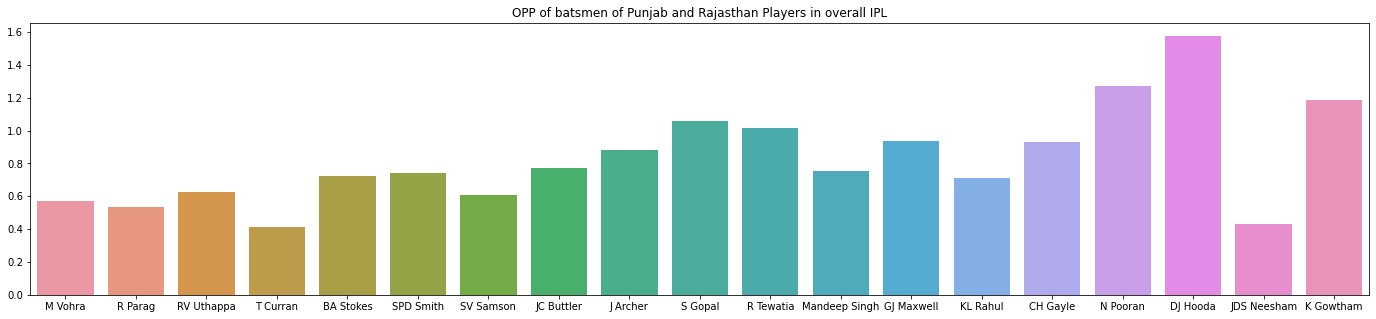

In [147]:
opp_batsman_overall = pd.Series(list(opp_batsman_dict_overall.values()),index = list(opp_batsman_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(24,5))
sns.barplot(x = opp_batsman_overall.index, y = opp_batsman_overall,ax=ax)
plt.title('OPP of batsmen of Punjab and Rajasthan Players in overall IPL')
plt.show()

**DJ Hooda has the best OPP score followed by N Pooran and K Gowtham in overall IPL.**

In [174]:
max_opp_batsman_value = np.max(list(opp_batsman_dict_overall.values()))
min_opp_batsman_value = np.min(list(opp_batsman_dict_overall.values()))
normalised_opp_batsman_dict_overall = {}
for i in opp_batsman_dict_overall:
    normalised_opp_batsman_dict_overall[i] = (opp_batsman_dict_overall[i] - min_opp_batsman_value)/(max_opp_batsman_value - min_opp_batsman_value)
normalised_opp_batsman_dict_overall

{'M Vohra': 0.1343496502888631,
 'R Parag': 0.10419401365873769,
 'RV Uthappa': 0.18174410936189783,
 'T Curran': 0.0,
 'BA Stokes': 0.2652636776640303,
 'SPD Smith': 0.27965072708763705,
 'SV Samson': 0.16473050352396165,
 'JC Buttler': 0.3098547287248104,
 'J Archer': 0.40439373830547154,
 'S Gopal': 0.5550410642308394,
 'R Tewatia': 0.5156417354747289,
 'Mandeep Singh': 0.29016810703544105,
 'GJ Maxwell': 0.4490464201774313,
 'KL Rahul': 0.2555424074977522,
 'CH Gayle': 0.442331221013391,
 'N Pooran': 0.7382320897311476,
 'DJ Hooda': 1.0,
 'JDS Neesham': 0.012510852208001258,
 'K Gowtham': 0.6629755161257883}

In [149]:
opp_bowler_dict_overall = {}
bowlers_overall = ['R Parag', 'T Curran', 'AS Rajpoot', 'VR Aaron', 'AJ Tye', 'S Gopal', 'JD Unadkat', 'K Gowtham', 'J Archer', 'BA Stokes', 'R Tewatia', 'Mohammed Shami', 'A Singh', 'M Ashwin', 'GJ Maxwell', 'JDS Neesham', 'CJ Jordan', 'M Ur Rahman']
total_ids = list(df1[df1['bowler'].isin(bowlers_overall)]['match_id'].unique())
for j in bowlers_overall:
    opp_bowler_list = []
    for k in total_ids:
        batsman_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['batsman_runs'])
        wide_balls = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['wide_runs'])
        no_balls = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['noball_runs'])
        total_balls = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['ball'])
        legal_balls = len(total_balls)
        boundary_runs = 0
        boundary_count = 0
        opp = -999
        for i in range(len(batsman_runs)):
            if wide_balls[i] != 0:
                legal_balls -= 1
            elif no_balls[i] != 0:
                legal_balls -= 1
            if batsman_runs[i] >= 4:
                boundary_runs += batsman_runs[i]
                boundary_count += 1
        if legal_balls>0 and boundary_count>0:
            opp = (boundary_runs/boundary_count)/legal_balls
        else:
            opp = -999
        if opp > 0:
            opp_bowler_list.append(opp)
    if len(opp_bowler_list) != 0:
        opp_bowler_dict_overall[j] = opp_bowler_list
for k,v in opp_bowler_dict_overall.items():
    opp_bowler_dict_overall[k] = np.mean(v)
opp_bowler_dict_overall

{'R Parag': 0.5079365079365079,
 'T Curran': 1.4733333333333332,
 'AS Rajpoot': 0.27917673107890506,
 'VR Aaron': 0.2563281230621979,
 'AJ Tye': 0.21241181657848326,
 'S Gopal': 0.2847085495522996,
 'JD Unadkat': 0.2377818823348524,
 'K Gowtham': 0.33314660921309125,
 'J Archer': 0.20142216336295285,
 'BA Stokes': 0.24617283950617283,
 'R Tewatia': 0.3484477124183007,
 'Mohammed Shami': 0.2370259518212864,
 'A Singh': 0.25124489037532516,
 'M Ashwin': 0.27552910052910057,
 'GJ Maxwell': 0.6081649831649831,
 'JDS Neesham': 0.4409722222222222,
 'CJ Jordan': 0.3580654761904762,
 'M Ur Rahman': 0.21149470899470904}

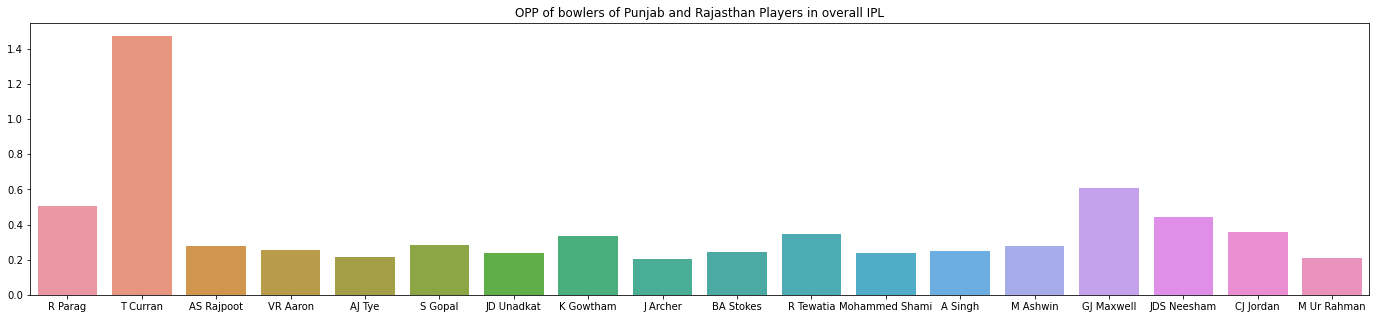

In [150]:
opp_bowler_overall = pd.Series(list(opp_bowler_dict_overall.values()),index = list(opp_bowler_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(24,5))
sns.barplot(x = opp_bowler_overall.index, y = opp_bowler_overall,ax=ax)
plt.title('OPP of bowlers of Punjab and Rajasthan Players in overall IPL')
plt.show()

**T Curran has the best OPP score for bowlers followed by GJ Maxwell in overall IPL.**

In [175]:
max_opp_bowler_value = np.max(list(opp_bowler_dict_overall.values()))
min_opp_bowler_value = np.min(list(opp_bowler_dict_overall.values()))
normalised_opp_bowler_dict_overall = {}
for i in opp_bowler_dict_overall:
        normalised_opp_bowler_dict_overall[i] = (opp_bowler_dict_overall[i] - min_opp_bowler_value)/(max_opp_bowler_value - min_opp_bowler_value)
normalised_opp_bowler_dict_overall

{'R Parag': 0.24098722600312808,
 'T Curran': 1.0,
 'AS Rajpoot': 0.061132073962180025,
 'VR Aaron': 0.043168077296249906,
 'AJ Tye': 0.008640267870111037,
 'S Gopal': 0.06548129158366167,
 'JD Unadkat': 0.028586681075177818,
 'K Gowtham': 0.10356418668231834,
 'J Archer': 0.0,
 'BA Stokes': 0.03518380622780608,
 'R Tewatia': 0.11559419598364853,
 'Mohammed Shami': 0.02799235457548713,
 'A Singh': 0.03917154608645552,
 'M Ashwin': 0.05826423960713663,
 'GJ Maxwell': 0.31978870019004735,
 'JDS Neesham': 0.18833867058880213,
 'CJ Jordan': 0.12315585909287295,
 'M Ur Rahman': 0.00791922098772885}

In [177]:
from collections import Counter
normalised_opp_dict_overall = Counter(normalised_opp_batsman_dict_overall) + Counter(normalised_opp_bowler_dict_overall)
normalised_opp_dict_overall

Counter({'M Vohra': 0.1343496502888631,
         'R Parag': 0.34518123966186576,
         'RV Uthappa': 0.18174410936189783,
         'T Curran': 1.0,
         'BA Stokes': 0.3004474838918364,
         'SPD Smith': 0.27965072708763705,
         'SV Samson': 0.16473050352396165,
         'JC Buttler': 0.3098547287248104,
         'J Archer': 0.40439373830547154,
         'S Gopal': 0.6205223558145011,
         'R Tewatia': 0.6312359314583774,
         'Mandeep Singh': 0.29016810703544105,
         'GJ Maxwell': 0.7688351203674786,
         'KL Rahul': 0.2555424074977522,
         'CH Gayle': 0.442331221013391,
         'N Pooran': 0.7382320897311476,
         'DJ Hooda': 1.0,
         'JDS Neesham': 0.2008495227968034,
         'K Gowtham': 0.7665397028081067,
         'AS Rajpoot': 0.061132073962180025,
         'VR Aaron': 0.043168077296249906,
         'AJ Tye': 0.008640267870111037,
         'JD Unadkat': 0.028586681075177818,
         'Mohammed Shami': 0.02799235457548713,
        

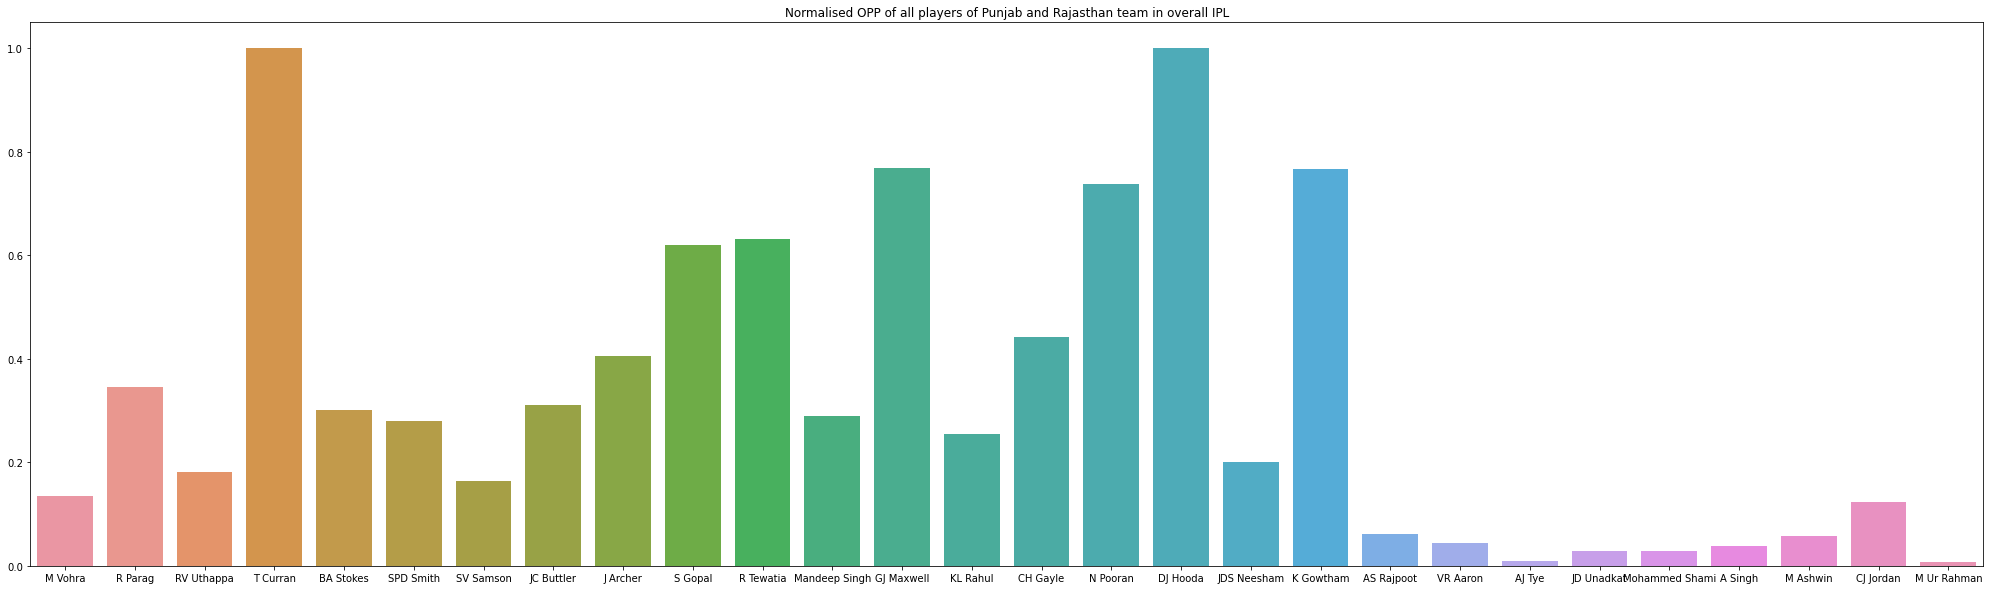

In [178]:
normalised_opp_overall = pd.Series(list(normalised_opp_dict_overall.values()),index = list(normalised_opp_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(35,10))
sns.barplot(x = normalised_opp_overall.index, y = normalised_opp_overall,ax=ax)
plt.title('Normalised OPP of all players of Punjab and Rajasthan team in overall IPL')
plt.show()

**T Curran and DJ Hooda have the highest OPP in overall IPL till now. They are followed by GJ Maxwell, N pooran and K Gowtham.**

## How many dot balls will be bowled in entire match:

In [153]:
dot_ball_list = []
for j in ids:
    total_runs = list(delivery[delivery['match_id'] == j]['total_runs'])
    dot_balls = 0
    for i in total_runs:
        if i == 0:
            dot_balls += 1
    dot_ball_list.append(dot_balls)
print(dot_ball_list)

[99, 73, 71, 95, 75, 108, 76, 75, 78, 101, 84, 102, 69, 86, 105, 79, 81, 83, 70]


These are dot balls bowled in a match between Rajasthan vs Punjab.

In [154]:
avg_dot_balls = np.mean(dot_ball_list)
avg_dot_balls

84.73684210526316

~85 dot balls in an average have been bowled in a match between Rajasthan and Punjab.

In [155]:
dot_ball_list_Rajasthan = []
for j in ids:
    total_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowling_team'] == 'Rajasthan Royals')]['total_runs'])
    dot_balls = 0
    for i in total_runs:
        if i == 0:
            dot_balls += 1
    dot_ball_list_Rajasthan.append(dot_balls)
print(dot_ball_list_Rajasthan)

[59, 38, 36, 53, 29, 59, 38, 42, 42, 54, 41, 50, 39, 42, 52, 40, 38, 43, 38]


These are dot balls bowled by Rajasthan in a match between Rajasthan vs Punjab.

In [156]:
avg_dot_balls_Rajasthan = np.mean(dot_ball_list_Rajasthan)
avg_dot_balls_Rajasthan

43.8421052631579

~44 dot balls in an average have been bowled by Rajasthan in a match between Rajasthan and Punjab.

In [157]:
dot_ball_list_Punjab = []
for j in ids:
    total_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowling_team'] == 'Kings XI Punjab')]['total_runs'])
    dot_balls = 0
    for i in total_runs:
        if i == 0:
            dot_balls += 1
    dot_ball_list_Punjab.append(dot_balls)
print(dot_ball_list_Punjab)

[40, 35, 35, 42, 46, 49, 38, 33, 36, 47, 43, 52, 30, 44, 53, 39, 43, 40, 32]


These are dot balls bowled by Punjab in a match between Rajasthan vs Punjab.

In [158]:
avg_dot_balls_Punjab = np.mean(dot_ball_list_Punjab)
avg_dot_balls_Punjab

40.89473684210526

~41 dot balls in an average have been bowled by Punjab in a match between Rajasthan and Punjab.

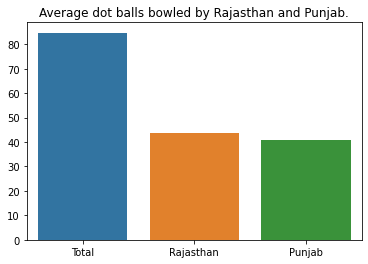

In [159]:
average_dot_balls = pd.Series([avg_dot_balls,avg_dot_balls_Rajasthan,avg_dot_balls_Punjab],index = ['Total','Rajasthan','Punjab'])
sns.barplot(x=average_dot_balls.index,y=average_dot_balls)
plt.title('Average dot balls bowled by Rajasthan and Punjab.')
plt.show()

**Rajasthan bowled more dot balls than Punjab in a match between them.**

In [160]:
dot_ball_list_overall_Punjab = []
total_ids = list(df1[df1['bowling_team'] == 'Kings XI Punjab']['match_id'].unique())
for j in total_ids:
    total_runs = list(df1[(df1['match_id'] == j) & (df1['bowling_team'] == 'Kings XI Punjab')]['total_runs'])
    dot_balls = 0
    for i in total_runs:
        if i == 0:
            dot_balls += 1
    dot_ball_list_overall_Punjab.append(dot_balls)
print(dot_ball_list_overall_Punjab)

[32, 53, 25, 41, 38, 16, 33, 23, 64, 50, 24, 38, 38, 25, 34, 47, 69, 39, 40, 46, 58, 40, 42, 43, 24, 41, 44, 50, 37, 9, 26, 46, 52, 54, 52, 46, 40, 37, 47, 47, 53, 62, 53, 44, 36, 35, 52, 35, 40, 40, 25, 36, 30, 33, 58, 39, 36, 36, 38, 34, 44, 32, 43, 40, 45, 49, 38, 41, 62, 51, 26, 35, 42, 54, 40, 36, 40, 38, 34, 45, 44, 42, 44, 29, 47, 63, 60, 61, 34, 53, 46, 44, 41, 51, 48, 44, 32, 49, 39, 48, 49, 41, 50, 34, 46, 47, 52, 55, 47, 30, 52, 34, 41, 43, 38, 43, 51, 45, 37, 36, 49, 58, 42, 42, 38, 44, 42, 26, 39, 38, 40, 41, 15, 36, 31, 31, 38, 30, 39, 33, 48, 29, 34, 31, 62, 33, 29, 46, 26, 39, 32, 29, 35, 49, 51, 40, 33, 36, 31, 10, 38, 42, 40, 40, 34, 45, 37, 41, 44, 28, 32, 36, 35, 22, 30, 34]


These are dot balls bowled by Punjab in overall IPL.

In [161]:
avg_dot_balls_overall_Punjab = np.mean(dot_ball_list_overall_Punjab)
avg_dot_balls_overall_Punjab

40.35795454545455

40 dot balls in an average have been bowled by Punjab in overall IPL.

In [162]:
dot_ball_list_overall_Rajasthan = []
total_ids = list(df1[df1['bowling_team'] == 'Rajasthan Royals']['match_id'].unique())
for j in total_ids:
    total_runs = list(df1[(df1['match_id'] == j) & (df1['bowling_team'] == 'Rajasthan Royals')]['total_runs'])
    dot_balls = 0
    for i in total_runs:
        if i == 0:
            dot_balls += 1
    dot_ball_list_overall_Rajasthan.append(dot_balls)
print(dot_ball_list_overall_Rajasthan)

[31, 54, 37, 64, 36, 61, 44, 47, 41, 41, 59, 51, 35, 46, 49, 37, 55, 52, 50, 44, 45, 51, 59, 59, 50, 36, 44, 37, 62, 33, 34, 27, 42, 38, 40, 36, 33, 33, 49, 39, 38, 43, 40, 50, 56, 33, 38, 42, 50, 57, 44, 31, 32, 35, 18, 44, 36, 47, 33, 46, 50, 35, 32, 40, 43, 30, 53, 38, 56, 43, 48, 35, 36, 55, 47, 52, 53, 48, 21, 56, 40, 40, 50, 49, 40, 49, 43, 39, 53, 42, 38, 29, 48, 50, 40, 37, 35, 43, 46, 37, 43, 38, 38, 22, 59, 37, 58, 60, 49, 38, 26, 42, 34, 51, 41, 46, 43, 43, 43, 12, 32, 36, 34, 44, 37, 36, 42, 42, 30, 46, 42, 46, 46, 43, 28, 45, 42, 32, 41, 34, 38, 42, 31, 51, 29, 8, 38]


These are dot balls bowled by Rajasthan in overall IPL.

In [163]:
avg_dot_balls_overall_Rajasthan = np.mean(dot_ball_list_overall_Rajasthan)
avg_dot_balls_overall_Rajasthan

41.843537414965986

~42 dot balls in an average have been bowled by Rajasthan in overall IPL.

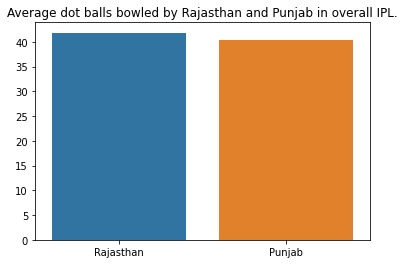

In [164]:
average_dot_balls_overall = pd.Series([avg_dot_balls_overall_Rajasthan,avg_dot_balls_overall_Punjab],index = ['Rajasthan','Punjab'])
sns.barplot(x=average_dot_balls_overall.index,y=average_dot_balls_overall)
plt.title('Average dot balls bowled by Rajasthan and Punjab in overall IPL.')
plt.show()

Rajasthan bowled more dot balls than Punjab in a match in overall IPL.

## How many balls will Mohammed Shami take, to get his first wicket:

In [165]:
ball_list = []
ids1 = delivery[delivery['bowler']=='Mohammed Shami']['match_id'].unique()
for j in ids1:
    dismissal_kind = list(delivery[(delivery['match_id']==j) & (delivery['bowler'] == 'Mohammed Shami')]['dismissal_kind'])
    wide_runs = list(delivery[(delivery['match_id']==j) & (delivery['bowler'] == 'Mohammed Shami')]['wide_runs'])
    noball_runs = list(delivery[(delivery['match_id']==j) & (delivery['bowler'] == 'Mohammed Shami')]['noball_runs'])
    counter = 0
    for i in dismissal_kind:
        counter += 1
        if i in (['caught','bowled','lbw','caught and bowled','stumped']):
            break
    ball = 0
    for i in range(0,counter):
        if noball_runs[i] != 0:
            ball -= 1
        elif wide_runs[i] != 0:
            ball -= 1
        else:
            ball += 1
    if ball > 0:
        ball_list.append(ball)
ball_list

[24, 13]

Mohammed Shami took wickets in 2 matches against Rajasthan and took 24 and 13 balls to get his first wicket.

In [166]:
ball_list_overall = []
ids2 = df1[df1['bowler']=='Mohammed Shami']['match_id'].unique()
for j in ids2:
    dismissal_kind = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Mohammed Shami')]['dismissal_kind'])
    wide_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Mohammed Shami')]['wide_runs'])
    noball_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Mohammed Shami')]['noball_runs'])
    counter = 0
    for i in dismissal_kind:
        counter += 1
        if i in (['caught','bowled','lbw','caught and bowled','stumped']):
            break
    ball = 0
    for i in range(0,counter):
        if noball_runs[i] != 0:
            ball -= 1
        elif wide_runs[i] != 0:
            ball -= 1
        else:
            ball += 1
    if ball > 0:
        ball_list_overall.append(ball)
print(ball_list_overall)

[16, 11, 2, 18, 12, 19, 14, 23, 18, 11, 21, 5, 14, 23, 24, 24, 23, 24, 5, 15, 21, 7, 14, 18, 23, 15, 17, 13, 14, 6, 12, 22, 21, 5, 24, 10, 17, 16, 23, 19, 10, 15, 13, 21, 6, 19, 17, 14]


Mohammed Shami took these many balls to take his first wicket in overall IPL.

In [167]:
avg_ball_overall= np.mean(ball_list_overall)
avg_ball_overall

15.708333333333334

Mohammed Shami took ~16 balls in an average to take his first wicket in overall IPL.

In [168]:
ball_list_overall_bowling_first = []
for j in ids2:
    dismissal_kind = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Mohammed Shami') & (df1['inning'] == 1)]['dismissal_kind'])
    wide_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Mohammed Shami') & (df1['inning'] == 1)]['wide_runs'])
    noball_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Mohammed Shami') & (df1['inning'] == 1)]['noball_runs'])
    counter = 0
    for i in dismissal_kind:
        counter += 1
        if i in (['caught','bowled','lbw','caught and bowled','stumped']):
            break
    ball = 0
    for i in range(0,counter):
        if noball_runs[i] != 0:
            ball -= 1
        elif wide_runs[i] != 0:
            ball -= 1
        else:
            ball += 1
    if ball > 0:
        ball_list_overall_bowling_first.append(ball)
print(ball_list_overall_bowling_first)

[2, 18, 12, 19, 23, 18, 11, 14, 23, 24, 15, 14, 15, 13, 14, 22, 21, 5, 10, 17, 23, 19, 6, 19, 14]


Mohammed Shami took these many balls to take his first wicket in overall IPL while bowling in first inning.

In [169]:
avg_ball_overall_bowling_first = np.mean(ball_list_overall_bowling_first)
avg_ball_overall_bowling_first

15.64

Mohammed Shami took ~16 balls in an average to take his first wicket in overall IPL while bowling in first inning.

In [170]:
ball_list_overall_bowling_second = []
for j in ids2:
    dismissal_kind = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Mohammed Shami') & (df1['inning'] == 2)]['dismissal_kind'])
    wide_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Mohammed Shami') & (df1['inning'] == 2)]['wide_runs'])
    noball_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'Mohammed Shami') & (df1['inning'] == 2)]['noball_runs'])
    counter = 0
    for i in dismissal_kind:
        counter += 1
        if i in (['caught','bowled','lbw','caught and bowled','stumped']):
            break
    ball = 0
    for i in range(0,counter):
        if noball_runs[i] != 0:
            ball -= 1
        elif wide_runs[i] != 0:
            ball -= 1
        else:
            ball += 1
    if ball > 0:
        ball_list_overall_bowling_second.append(ball)
print(ball_list_overall_bowling_second)

[16, 11, 14, 21, 5, 24, 23, 24, 5, 21, 7, 18, 23, 17, 6, 12, 24, 16, 10, 15, 13, 21, 17]


Mohammed Shami took these many balls to take his first wicket in overall IPL while bowling in second inning.

In [171]:
avg_ball_overall_bowling_second = np.mean(ball_list_overall_bowling_second)
avg_ball_overall_bowling_second

15.782608695652174

Mohammed Shami took ~16 balls in an average to take his first wicket in overall IPL while bowling in second inning.

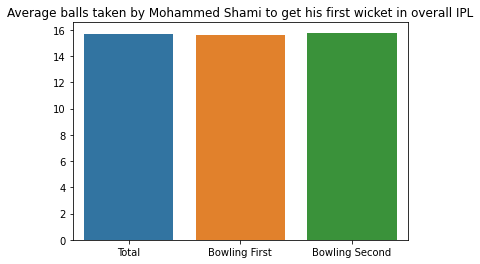

In [172]:
average_balls = pd.Series([avg_ball_overall,avg_ball_overall_bowling_first,avg_ball_overall_bowling_second],index = ['Total','Bowling First','Bowling Second'])
sns.barplot(x = average_balls.index , y = average_balls)
plt.title('Average balls taken by Mohammed Shami to get his first wicket in overall IPL')
plt.show()

**Mohammed Shami took more or less 16 balls to take his first wicket in overall IPL.**